In [7]:
from diffusers import StableDiffusionXLPipeline
import torch


pipe = StableDiffusionXLPipeline.from_pretrained("/home/wck/stable-diffusion-xl-base-0.9", torch_dtype=torch.float16, variant="fp16")
#pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)
pipe.to("cuda")
print(pipe.unet)
# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "Astronaut in a jungle, warm color palette, muted colors, detailed, 8k"
image = pipe(prompt=prompt).images[0]



  0%|          | 0/50 [00:00<?, ?it/s]

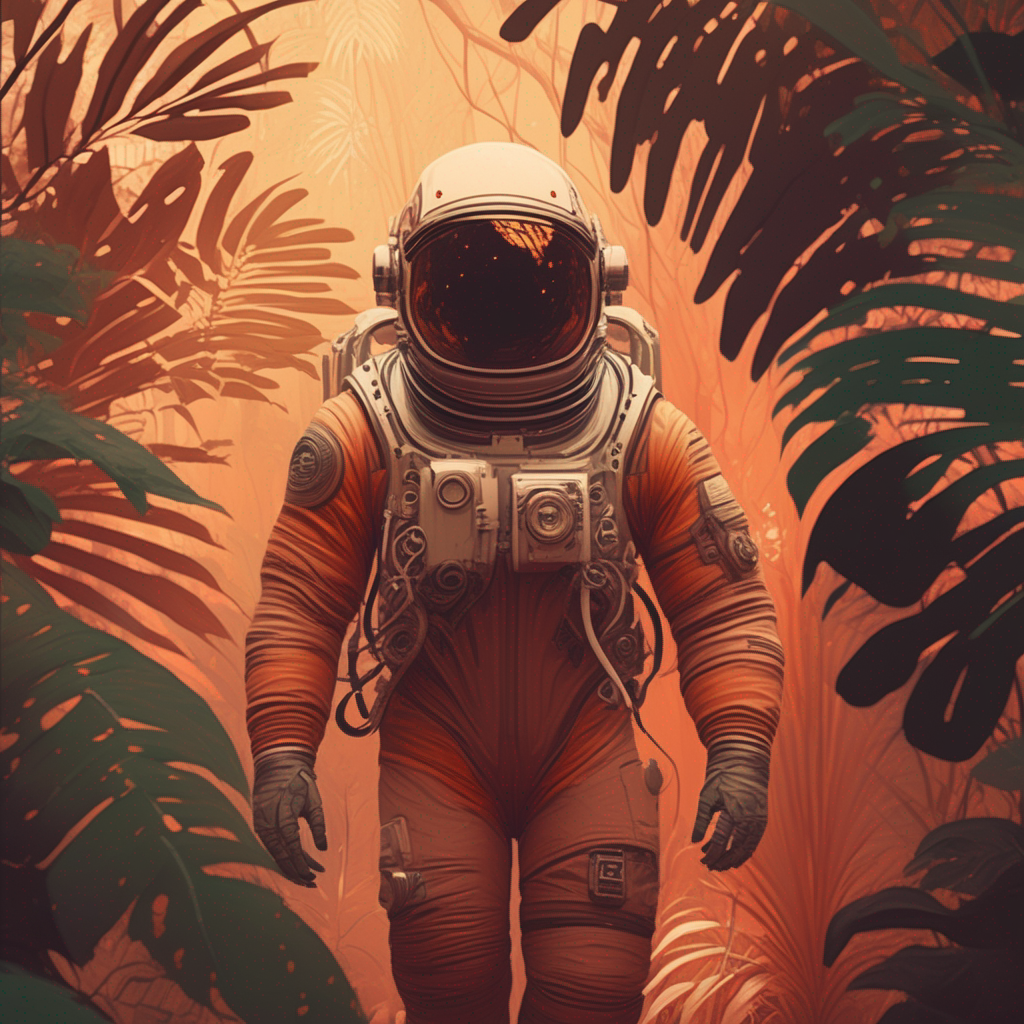

In [8]:
image

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (add_time_proj): Timesteps()
  (add_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=2816, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 320, eps=1e-05, affine=True)
          (conv1): Conv2d(320, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=1280, out_features=320, bias=True)
          (norm2): GroupNorm(32, 320, eps=1e-05, affine=True)
          (dropout): Dropout(p=